# Basics

## Dot Product
We can compute the dot product between two vectors using np.dot.

In [1]:
import numpy as np
import numpy.linalg as la

In [2]:
x = np.array([3,2,1])
y = np.array([4,5,6])
np.dot(x, y)

28

We can compute the product of two matrices or a matrix and a vector product using the @ syntax.

In [3]:
A = np.eye(3) #Create an identity matrix with np.eye
B = np.random.randn(3,3)
x = np.array([1,2,3])

## Product

In [4]:
#The product of two matrices.
A @ B

array([[-0.28997835,  0.44833389, -1.40832853],
       [-0.45865351, -0.5833615 , -2.67280666],
       [-1.86004623, -0.76433577, -0.80031693]])

In [5]:
#The product of a matrix and a vector.
A @ x

array([1., 2., 3.])

## Determinant
Determinant of a matrix can be find using the numpy.linalg.det(Matrix) of the numpy.linalg package.

In [6]:
#This computes the determinant.
la.det(A)

1.0

# Numerical Computation

## Part 1 

# Advanced Linear Algebra Operations

# Special Matrices

## Instructions

Test for the singular matrix.

If the matrix is singular:
- It's Inverse does not exists, i.e. it's determinant is zero.

We will check through our two methods:
1. Converting a matrix into echelon form, and test if if it fails by leaving zeros that can't be removed on the leading diagonal.
- Checking it's determinant.


## Example
In this exercise we will test whether a given matrix is singular.

### First Method

In [7]:
#Declarations.
#Run this cell first to load all the dependencies.
import numpy as np
import numpy.linalg as la

In [8]:
def isSingular(A):
    B = np.array(A, dtype = float)#Makes a Copy of Input Matrix, as we are going to alter its value.
    
    try:
        fixZerothRow(B)
        fixFirstRow(B)
        fixSecondRow(B)
        fixThirdRow(B)
    except matrixIsSingular:
        return True #Returing matrix is singular.
    return False #Returing matrix is not singular.

#This is our error flag.
class matrixIsSingular(Exception):pass

#For Zeroth Row, we want its first element to be one.
#For that we divide the entire row by the value of A[0,0].
#Before dividing we check whether the value of A[0,0] is equal to zero.
#If it's not equal the we add below rows to the A[0].
def fixZerothRow(A):
    if A[0,0] == 0: #Test.
        A[0] = A[0] + A[1]
    if A[0,0] == 0:
        A[0] = A[0] + A[2]
    if A[0,0] == 0:
        A[0] = A[0] + A[3]
    if A[0,0] == 0:
        raise matrixIsSingular()
    
    #Finally, set the diagonal element to one by dividing the entire row by that element.
    A[0] = A[0]/A[0,0]
    
    return A #Returning matrix.

def fixFirstRow(A):
    A[1] = A[1] - A[1,0]*A[0]
    
    if A[1,1] == 0:
        A[1] = A[1] + A[2]
    if A[1,1] == 0:
        A[1] = A[1] + A[3]
    if A[1,1] == 0:
        raise matrixIsSingular()
    
    #Finally, set the diagonal element to one by dividing the entire row by that element.
    A[1] = A[1]/A[1,1]
    
    return A #Returning matrix.

#Similarly the above process repeats in the following below rows.
def fixSecondRow(A):
    A[2] = A[2] - A[2,0]*A[0]
    A[2] = A[2] - A[2,1]*A[1]
    
    if A[2,2] == 0:
        A[2] = A[2] + A[3]
    if A[2,2] == 0:
        raise matrixIsSingular()
    
    #Finally, set the diagonal element to one by dividing the entire row by that element.
    A[2] = A[2]/A[2,2]
    
    return A #Returning matrix.

def fixThirdRow(A):
    A[3] = A[3] - A[3,0]*A[0]
    A[3] = A[3] - A[3,1]*A[1]
    A[3] = A[3] - A[3,2]*A[2]
    
    if A[3,3] == 0:
        raise matrixIsSingular()
    
    #Finally, set the diagonal element to one by dividing the entire row by that element.
    A[3] = A[3]/A[3,3]
    
    return A #Returning matrix.       

### Second Method

In [9]:
def checkSingularThroughDeterminant(A):
    if(la.det(A))==0.0: #Check if the determinant is equal to zero.
        return True
    else:
        return False

In [10]:
#Calculates Determinant and Inverse.
def calcDeterminantAndInverse(A):
    return la.det(A), la.inv(A) #Calculates and returns the Determinant of matrix.

In [11]:
A = np.array([[2,0,0,0],
              [0,3,0,0],
              [0,0,4,4],
              [0,0,5,5]], dtype = float)

if(isSingular(A)):
    print("The Given Matrix is Singular \n i.e.It's inverse does not exists")
else:
    Det, Inv =  calcDeterminantAndInverse(A)
    print("The Given Matrix is Non Singular \n i.e.It's inverse exists")
    print("\n It's Determinant is "+ str(Det) +" \n \n Its inverse is \n"+ str(Inv))

The Given Matrix is Singular 
 i.e.It's inverse does not exists


In [12]:
A = np.array([[2,0,0,0],
              [0,3,0,0],
              [0,0,4,4],
              [0,0,5,5]], dtype = float)

if(checkSingularThroughDeterminant(A)):
    print("The Given Matrix is Singular \n i.e.It's inverse does not exists")
else:
    Det, Inv =  calcDeterminantAndInverse(A)
    print("The Given Matrix is Non Singular \n i.e.It's inverse exists")
    print("\n It's Determinant is "+ str(Det) +" \n \n Its inverse is \n"+ str(Inv))

The Given Matrix is Singular 
 i.e.It's inverse does not exists


In [13]:
A = np.array([[2,0,0,0],
              [0,3,0,0],
              [0,0,4,4],
              [0,0,0,5]], dtype = float)

if(isSingular(A)):
    print("The Given Matrix is Singular \n i.e.It's inverse does not exists")
else:
    Det, Inv =  calcDeterminantAndInverse(A)
    print("The Given Matrix is Non Singular \n i.e.It's inverse exists")
    print("\n It's Determinant is "+ str(Det) +" \n \n Its inverse is \n"+ str(Inv))

The Given Matrix is Non Singular 
 i.e.It's inverse exists

 It's Determinant is 119.99999999999997 
 
 Its inverse is 
[[ 0.5         0.          0.          0.        ]
 [ 0.          0.33333333  0.          0.        ]
 [ 0.          0.          0.25       -0.2       ]
 [ 0.          0.          0.          0.2       ]]


In [14]:
A = np.array([[2,0,0,0],
              [0,3,0,0],
              [0,0,4,4],
              [0,0,0,5]], dtype = float)

if(checkSingularThroughDeterminant(A)):
    print("The Given Matrix is Singular \n i.e.It's inverse does not exists")
else:
    Det, Inv =  calcDeterminantAndInverse(A)
    print("The Given Matrix is Non Singular \n i.e.It's inverse exists")
    print("\n It's Determinant is "+ str(Det) +" \n \n Its inverse is \n"+ str(Inv))

The Given Matrix is Non Singular 
 i.e.It's inverse exists

 It's Determinant is 119.99999999999997 
 
 Its inverse is 
[[ 0.5         0.          0.          0.        ]
 [ 0.          0.33333333  0.          0.        ]
 [ 0.          0.          0.25       -0.2       ]
 [ 0.          0.          0.          0.2       ]]


# Eigen Values and Eigen Vectors

## Introduction

Eigen is usefully translated from German meaning characteristics.

Consider the below image having three vectors.


![title](img\eigenvectors.png)

We apply the transformation which is scaling with factor 2 in the horizontal direction and 0.5 in the vertical direction.

A vector $\vec{v}$ is then scaled by applying this transformation as $\vec{v}\prime = A\vec{v}$. 


The above figure shows that the direction of some vectors (in red) not affected by the linear transformation. These vectors are called $eigenvectors$ of the transformation.

An eigenvector is a vector whose direction remains unchanged when a linear transformation is applied to it. 

$A=\begin{bmatrix} 2 & 0 \\ 0 & \frac{1}{2} \end{bmatrix}$.


In general, the eigenvector $\vec{v}$ of a matrix A is the vector for which the following holds:

 \begin{equation*} A \vec{v} = \lambda \vec{v} \end{equation*}

where $\lambda$ is a scalar value called the $eigenvalue$.

## Application
1. Stability of a system.
- In Electronics: RLC circuits.
- Famous Google's Page Rank Algorithm.
- Communication systems, etc.




## Example

In this exercise we will find the eigen values and eigen vectors of the matrix $ M = \begin{bmatrix}
\frac{3}{2} & -1 \\
\frac{-1}{2} & \frac{1}{2}
\end{bmatrix}$.

In [15]:
#Declarations.
#Run this cell first to load all the dependencies.
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [18]:
#Function will plot the Vectors.
def plot(A,B):
    Vec = np.array(A, dtype = float) #Original Vector Sets.
    ONor = np.array(B, dtype = float) #Orthonormal Vector Sets.
    
    #Origin Points.
    X = np.array((0))
    Y= np.array((0))
    
    #First Vector.
    U = A[0,0]
    V = A[1,0]
    
    q1 = plt.quiver(X, Y, U, V,color='r',units='xy' ,scale=1)#Drawing First Vector.
    
    #Limits For Graph.
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.quiverkey(q1, 3, 3, 2, 'Vector 1', coordinates='data')
    
    #First Eigen Vector.
    U = B[0,0]
    V = B[1,0]
    
    q2 = plt.quiver(X, Y, U, V,color='b',units='xy' ,scale=1)#Drawing First Eigen Vector.
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.quiverkey(q2, 3, 1, 2, 'Eigen Vector 1', coordinates='data')

    #Second Vector.
    U = A[0,1]
    V = A[1,1]
    
    q3 = plt.quiver(X, Y, U, V,color='y',units='xy' ,scale=1)#Drawing Second Vector.
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    
    plt.quiverkey(q3, 3, -1, 2, 'Vector 2', coordinates='data')
    
    #Second Eigen Vector.
    U = B[0,1]
    V = B[1,1]
    
    q4 = plt.quiver(X, Y, U, V,color='g',units='xy' ,scale=1)#Drawing Second Eigen Vector.
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    
    plt.quiverkey(q4, 3, -3, 2, 'Eigen Vector 2', coordinates='data')
    
    #Label.
    plt.legend(bbox_to_anchor=(2, 1.05), handles = [q1,q2,q3,q4], 
           labels  = [A[:,0], B[:,0], A[:,1], B[:,1]])
    
    
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.title('Plotting Eigen Vectors')
    plt.show()


The eigenvalues are
 [1.8660254 0.1339746]
The eigenvectors are
 [[ 0.9390708   0.59069049]
 [-0.34372377  0.80689822]]


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


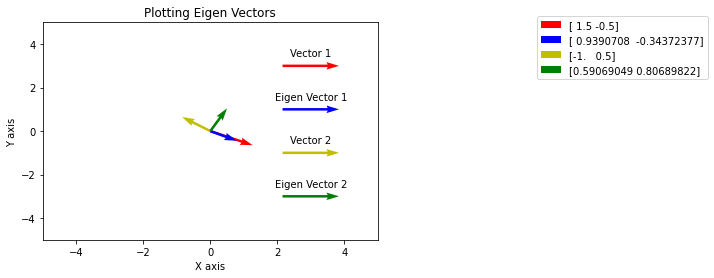

In [19]:
M = np.array([[3/2, -1],[-1/2, 1/2]])#Matrix to find eigen value and eigen vectors.
#Feel Free to try with different Matrix.

#Calculation of eigenvalue and eigenvector.
evals, evecs = la.eig(M)

print("The eigenvalues are\n", evals)
print("The eigenvectors are\n", evecs)

plot(M,evecs)



# Diagonalization

## Introduction

The process of diagonalization involves taking a matrix and writing it as the product of the matrices.
Let us have write matrix A as,

A = $X^{-1}DX$

where,
 D $\rightarrow$ Diagonal Matrix

If we do,
$X^{-1}AX$ = $X^{-1}XDX^{-1}X$,

we get,

$\therefore X^{-1}AX$ = $D$

Through this way we get diagonal matrix D.

For this proces to work,
1. A must have unique Eigen values.
- If A has duplicate eigen values then they must have linearly independent eigen vectors.

The matrix D contains values at its diagonal, where this diagonal elements are made up of eigen values of A while the matrix $X$ is made up of eigen vectors of A.

A $\rightarrow$ n$\times$n matrix,$   D =
  \begin{bmatrix}
    \lambda_{1} & & \\
    & \ddots & \\
    & & \lambda_{n}
  \end{bmatrix}  $ and $  X =
  \begin{bmatrix}
    \vec X_1 & \vec X_2 & .... & \vec X_n \\
  \end{bmatrix}$



## Example

In this exercise we will diagonalize the matrix $ A = \begin{bmatrix}
-3 & -4 \\
5 & 6
\end{bmatrix}$.

In [20]:
def diagonalize(A):
    
    vals,vecs = la.eig(A)
    D = np.diag(vals)
    return D,vecs

In [21]:
A = np.array([[-3,-4],[5, 6]])
D,X = diagonalize(A)
print('Diagonal matrix is')
print(D)
print('X Matrix is')
print(X)

Diagonal matrix is
[[1. 0.]
 [0. 2.]]
X Matrix is
[[-0.70710678  0.62469505]
 [ 0.70710678 -0.78086881]]


# Single Value Decomposition
Single Value Decomposition (SVD) is decomposing vectors onto orthogonal axes.

When the vector $\vec a$ can be decomposed to get 3 different information:

1. The directions of projection — The unit vectors (v₁ and v₂) representing the directions onto which we project.

- The lengths of projection ($s_{a1}$ and $s_{a2}$) — Gives information about how much the vector is contained in each direction of projection.

- The vectors of projection ($p_{a1}$ and $p_{a2}$) — Used to reconstruct the original vector $\vec a$ by adding them together, and verify that $p_{a1} = s_{a1}\times v_1$ and $p_{a2} = s_{a2}\times v_2$. 

- The vectors of projection are redundant, as they can be deduced from the former 2 pieces.

### Conclusion:
Any vector can be expressed in terms of:
1. Projection directions unit vectors (v₁, v₂, …).
2. The lengths of projections onto them (sₐ₁, sₐ₂, …).

### Applications:
1. Soliving Simultaneous equations.
- Data Compression.

## Explanation 

Singular value decomposition is a method of decomposing a matrix into three other matrices:

$C = USV^{T}$

Where:

C $\rightarrow$ m × n Matrix,

U $\rightarrow$ m × n Orthogonal matrix,

S $\rightarrow$ n × n Diagonal matrix with non negative entries,

V $\rightarrow$ n × n Orthogonal matrix

We need to use these two relations to find value of U,V ans S:
1. $C^TC = V S^TSV^T$
- $CV = US$
                                                        
### Steps:
1. From the first relation, we get the value of $V$ as it's a matrix containing eigen vectors of $C^TC$ and S as it's a diagonal matrix containing eigen values of $C^TC$ as its's entries.
- Then we get the value of $U$ from the second expression.

## Example

In this exercise we will find the single value decomposition of matrix $ C = \begin{bmatrix}
5 & -1 \\
5 & 7
\end{bmatrix}$.

In [22]:
#Declarations.
#Run this cell first to load all the dependencies.
import numpy as np
import numpy.linalg as la

In [23]:
def SVD(A):
    AT_A = np.transpose(A)@A
    u, s, v = np.linalg.svd(A, full_matrices=False)
    
    return u,s,v,AT_A

In [24]:
C = np.array([[5,-1],
              [5,7]])
U,S,V,CT_C = SVD(C)
print('The U Matrix is')
print(U)
print('having dimensions ' +str(U.shape[0])+ ' times '+str(U.shape[1]))
print('\n')

print('The S Matrix is')
print(S)
print('having dimensions ' +str(S.shape))
print('\n')

print('The V Matrix is')
print(V)
print('having dimensions ' +str(V.shape[0])+ ' times '+str(V.shape[1]))
print('\n')

print('The C^T C Matrix is')
print(CT_C)
print('having dimensions ' +str(CT_C.shape[0])+ ' times '+str(CT_C.shape[1]))
print('\n')


The U Matrix is
[[-0.31622777 -0.9486833 ]
 [-0.9486833   0.31622777]]
having dimensions 2 times 2


The S Matrix is
[8.94427191 4.47213595]
having dimensions (2,)


The V Matrix is
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
having dimensions 2 times 2


The C^T C Matrix is
[[50 30]
 [30 50]]
having dimensions 2 times 2




# Projection of Vectors

The projection of a vector $\overrightarrow{u}$ onto another vector $\overrightarrow{v}$ is given as
  $proj_{\vec{v}}({\vec{u}}) = \frac{\vec{u}.\vec{v}}{||\vec{v}||^{2}} \vec{v}$  

## Example

In this exercise we will project the vector $\vec u$ on $\vec v$ and plot them.

In [25]:
#Declarations.
#Run this cell first to load all the dependencies.
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [26]:
#Function will plot the Vectors.
def plot(A,B,P):
    
    #Origin Points.
    X = np.array((0))
    Y= np.array((0))
    
    #First Vector.
    U = A[0]
    V = A[1]
    
    q1 = plt.quiver(X, Y, U, V,color='r',units='xy' ,scale=1)#Drawing First Vector.
    
    #Limits For Graph.
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.quiverkey(q1, 3, 1, 2, 'U', coordinates='data')
    
    #Second Vector.
    U = B[0]
    V = B[1]
    
    q2 = plt.quiver(X, Y, U, V,color='b',units='xy' ,scale=1)#Drawing First Eigen Vector.
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.quiverkey(q2, 3, -1, 2, 'V', coordinates='data')

    #Projection.
    U = P[0]
    V = P[1]
    
    q3 = plt.quiver(X, Y, U, V,color='y',units='xy' ,scale=1)#Drawing Second Vector.
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    
    plt.quiverkey(q3, 3, -3, 2, 'Projection of U on V', coordinates='data')
    
    
    
    #Label.
    plt.legend(bbox_to_anchor=(2, 1.05), handles = [q1,q2,q3], 
           labels  = [A, B, P])
    
    
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.title('Projection of U on V')
    plt.show()


In [27]:
def projection(u,v):
    Norm = np.sqrt(sum(v**2))     
   
    #Projection a vector onto another vector 
    # find dot product using np.dot() 
    projUonV = (np.dot(u, v)/Norm**2)*v 
    
    return projUonV


The Projection of u on v is [2.28 3.04]


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


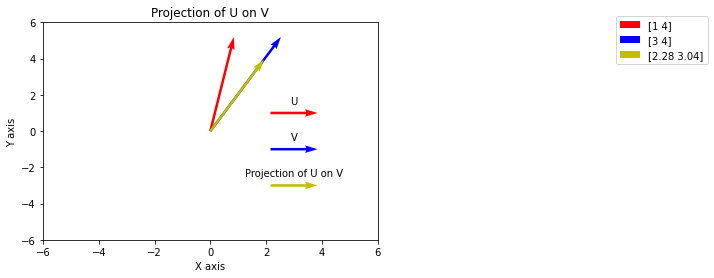

In [28]:
u = np.array([1, 4])  
v = np.array([3, 4]) 

projUonV = projection(u,v)
print('The Projection of u on v is '+ str(projUonV))

plot(u,v,projUonV)

# Gram Schmidt Process

A set of unit length basis vectors that are all perpendicular to each other are called as **Orthonormal Basis Sets** and the matrix composed of them is called as **Orthogonal Matrix**.

#### Gram Schmidt Process is the process of constructing **Orthonormal sets**.

The Gram–Schmidt process works as follows:

 {\begin{aligned}\mathbf {u} _{1}&=\mathbf {v} _{1},&\mathbf {e} _{1}&={\mathbf {u} _{1} \over \|\mathbf {u} _{1}\|}\\\mathbf {u} _{2}&=\mathbf {v} _{2}-(\mathbf {v} _{2}\mathbf {e} _{1})\,(\mathbf {e} _{1}),&\mathbf {e} _{2}&={\mathbf {u} _{2} \over \|\mathbf {u} _{2}\|}\\\mathbf {u} _{3}&=\mathbf {v} _{3}-(\mathbf {v} _{3}\mathbf {e} _{1})\,(\mathbf {e} _{1})-(\mathbf {v} _{3}\mathbf {e} _{2})\,(\mathbf {e} _{2}),&\mathbf {e} _{3}&={\mathbf {u} _{3} \over \|\mathbf {u} _{3}\|}\\\\&{}\ \ \vdots &&{}\ \ \vdots \\\mathbf {u} _{k}&=\mathbf {v} _{k}-\sum _{j=1}^{k-1}\mathrm {proj} _{\mathbf {u} _{j}}\,(\mathbf {v} _{k}),&\mathbf {e} _{k}&={\mathbf {u} _{k} \over \|\mathbf {u} _{k}\|}.\end{aligned}}
 
### Conclusion 
Calculation of Orthonormal Sets make $A^{-1} \cdot A$ easier.

## Example

In this exercise we will perform the Gram Schmidt Process for 4 and n Basis Vectors.

In [29]:
#Declarations.
#Run this cell first to load all the dependencies.
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [30]:
smallNumber = 1e-14 #Declaring Very Small Number


#Function will perform the Gram Schmidt Proces for 4 Basis Vectors.
def getBasis4(A):
    B = np.array(A, dtype = float) #Makes a Copy of Input Matrix, as we are going to alter its value.
    
    #We just have to normalize the zeroth vector.
    B[:,0] = B[:,0]/la.norm(B[:,0])
    
    #For first vector we have to subtract any overlap with new zeroth vector.
    B[:,1] = B[:,1] - (B[:,1]@B[:,0])*B[:,0]
    
    #If the vector is greater than smallNumber than,we normalize it. Otherwise we set the vector to zero. 
    if la.norm(B[:,1]) > smallNumber:
        B[:,1] = B[:,1]/la.norm(B[:,1])
    else:
        B[:,1] = np.zeros_like(B[:,1])
        
    #Similarly,For second vector we have to subtract any overlap with new zeroth vector and new first vector.   
    B[:,2] = B[:,2] - (B[:,2]@B[:,0])*B[:,0]
    B[:,2] = B[:,2] - (B[:,2]@B[:,1])*B[:,1]
    
    #If the vector is greater than smallNumber than,we normalize it. Otherwise we set the vector to zero.
    if la.norm(B[:,2]) > smallNumber:
        B[:,2] = B[:,2]/la.norm(B[:,2])
    else:
        B[:,2] = np.zeros_like(B[:,2])
        
    #Similar Procedure followed    
    B[:,3] = B[:,3] - (B[:,3]@B[:,0])*B[:,0]
    B[:,3] = B[:,3] - (B[:,3]@B[:,1])*B[:,1]
    B[:,3] = B[:,3] - (B[:,3]@B[:,2])*B[:,2]
    
    if la.norm(B[:,3]) > smallNumber:
        B[:,3] = B[:,3]/la.norm(B[:,3])
    else:
        B[:,3] = np.zeros_like(B[:,3])
    
    #Finally, we return the results
    return B

#Function will perform the Gram Schmidt Proces for n Basis Vectors
def getBasis(A):
    B = np.array(A, dtype = float) #Makes a Copy of Input Matrix, as we are going to alter its value.
    
    #Loop over all vectors with label i. 
    for i in range(B.shape[1]):
        #Loop over all previous vectors j to subtract. 
        for j in range(i):
            #The Current Vector B[:,i] and the previous vector B[:,j].
            B[:,i] = B[:,i] - (B[:,i]@B[:,j])*B[:,j]
        
        #If the vector is greater than smallNumber than,we normalize it. Otherwise we set the vector to zero. 
        if la.norm(B[:,i]) > smallNumber:
            B[:,i] = B[:,i]/la.norm(B[:,i])
        else:
            B[:,i] = np.zeros_like(B[:,i])  
            
    #Finally, we return the results        
    return B 


#Function will plot the Vectors.
def plot(A,B):
    Vec = np.array(A, dtype = float) #Original Vector Sets.
    ONor = np.array(B, dtype = float) #Orthonormal Vector Sets.
    
    #Origin Points.
    X = np.array((0))
    Y= np.array((0))
    
    #First Vector.
    U = A[0,0]
    V = A[1,0]
    
    q1 = plt.quiver(X, Y, U, V,color='r',units='xy' ,scale=1)#Drawing First Vector.
    
    #Limits For Graph.
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.quiverkey(q1, 3, 3, 2, 'Vector 1', coordinates='data')
    
    #First Orthonormal Vector.
    U = B[0,0]
    V = B[1,0]
    
    q2 = plt.quiver(X, Y, U, V,color='b',units='xy' ,scale=1)#Drawing First Orthonormal Vector.
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.quiverkey(q2, 3, 1, 2, 'Orthonormal Vector 1', coordinates='data')

    #Second Vector.
    U = A[0,1]
    V = A[1,1]
    
    q3 = plt.quiver(X, Y, U, V,color='y',units='xy' ,scale=1)#Drawing Second Vector.
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    
    plt.quiverkey(q3, 3, -1, 2, 'Vector 2', coordinates='data')
    
    #Second Orthonormal Vector.
    U = B[0,1]
    V = B[1,1]
    
    q4 = plt.quiver(X, Y, U, V,color='g',units='xy' ,scale=1)#Drawing Second Orthonormal Vector.
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    
    plt.quiverkey(q4, 3, -3, 2, 'Orthonormal Vector 2', coordinates='data')
    
    #Label.
    plt.legend(bbox_to_anchor=(2, 1.05), handles = [q1,q2,q3,q4], 
           labels  = [A[:,0], B[:,0], A[:,1], B[:,1]])
    
    
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.title('Gram Schmidt Process')
    plt.show()


In [31]:
Vector = np.array([[1,0,2,6],
                   [0,1,8,2],
                   [2,8,3,1],
                   [1,-6,2,3]],dtype = float)

#Calling Function that will perform the Gram Schmidt Process for 4 Basis Vectors.
getBasis4(Vector)

array([[ 0.40824829, -0.1814885 ,  0.04982278,  0.89325973],
       [ 0.        ,  0.1088931 ,  0.99349591, -0.03328918],
       [ 0.81649658,  0.50816781, -0.06462163, -0.26631346],
       [ 0.40824829, -0.83484711,  0.07942048, -0.36063281]])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


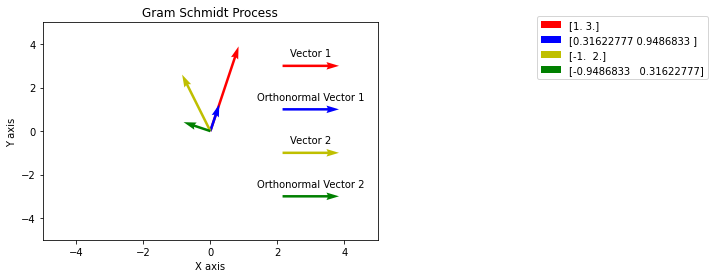

In [32]:
Vector = np.array([[1,-1],
                  [3,2]],dtype = float)

#Calling Function that will perform the Gram Schmidt Process for n Basis Vectors.
V = getBasis(Vector)

#Callinfg Function to plot these vectors.
plot(Vector,V)

# Numerical Computation

## Part 2

# Change of Basis

## Explanation
Let us consider a vector $\vec ourVector$ which is $\begin{bmatrix}
5 \\
2
\end{bmatrix}$
in my world having basis vectors $\begin{bmatrix}
1 \\
0
\end{bmatrix}$ & $\begin{bmatrix}
0 \\
1
\end{bmatrix}$.


But my cat says this vector in it's world is represented as $\vec catVector = \begin{bmatrix}
\frac{3}{2} \\
\frac{1}{2}
\end{bmatrix}$.

This is the case when the same vector is having different representions in the different worlds of perspective having different basis vectors.

Let A be the matrix having my basis vectors $\begin{bmatrix}
\vec V_1 & \vec V_2
\end{bmatrix}$ as $\begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}$
and B be the matrix having cat's basis vector in my world $\begin{bmatrix}
\vec C_1 & \vec C_2
\end{bmatrix}$ as $\begin{bmatrix}
3& 1\\
1& 1
\end{bmatrix}$



So to get the vector $\vec ourVector$ $\begin{bmatrix}
5 \\
2
\end{bmatrix}$ in cats's world we use the relation, $B^{-1} \cdot \vec ourVector = \begin{bmatrix}
3& 1\\
1& 1
\end{bmatrix}^{-1}\begin{bmatrix}
5 \\
2
\end{bmatrix} = \vec catsVector$

## Example

In this exercise we will change the basis (2D Matrix) from our world to the cat's world.

In [33]:
#Declarations.
#Run this cell first to load all the dependencies.
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [34]:
B = np.array([[3,1],
              [1,1]])
V = np.array([[5],
              [2]])


catVector = la.inv(B)@V

print("The Cat's Vector is")
catVector

The Cat's Vector is


array([[1.5],
       [0.5]])

To get vector $\vec ourVector$ in our representation (i.e. Our World) from the vector $\vec catsVector$ in cat's world, we use the relation,

$B \cdot \vec catsVector = 
\begin{bmatrix}
3& 1\\
1& 1
\end{bmatrix} \begin{bmatrix}
\frac{3}{2} \\
\frac{1}{2}
\end{bmatrix}$ = $\vec ourVector$

In [35]:
B = np.array([[3,1],
              [1,1]])
V = np.array([[1.5],
              [0.5]])

ourVector = B@V

print("The Vector in our world is")
ourVector

The Vector in our world is


array([[5.],
       [2.]])

## Applying Transformation

In [36]:
smallNumber = 1e-14 #Declaring Very Small Number

def getBasis(A):
    B = np.array(A, dtype = float) #Makes a Copy of Input Matrix, as we are going to alter its value.
    
    #Loop over all vectors with label i. 
    for i in range(B.shape[1]):
        #Loop over all previous vectors j to subtract. 
        for j in range(i):
            #The Current Vector B[:,i] and the previous vector B[:,j].
            B[:,i] = B[:,i] - (B[:,i]@B[:,j])*B[:,j]
        
        #If the vector is greater than smallNumber than,we normalize it. Otherwise we set the vector to zero. 
        if la.norm(B[:,i]) > smallNumber:
            B[:,i] = B[:,i]/la.norm(B[:,i])
        else:
            B[:,i] = np.zeros_like(B[:,i])  
            
    #Finally, we return the results        
    return B 



def buildReflectionMatrix(A):
    
    E = getBasis(A)
    
    TE = np.array([[1,0],[0,-1]])
    
    T = E @ TE @ np.transpose(E)
    
    return T

def plot(A,B):
    Vec = np.array(A, dtype = float) #Original Vector Sets.
    ONor = np.array(B, dtype = float) #Orthonormal Vector Sets.
    
    #Origin Points.
    X = np.array((0))
    Y= np.array((0))
    
    #Cat Basis1.
    U = A[0,0]
    V = A[1,0]
    
    q1 = plt.quiver(X, Y, U, V,color='r',units='xy' ,scale=1)#Drawing First Vector.
    
    #Limits For Graph.
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.quiverkey(q1, 3, 3, 2, 'Cat Basis1', coordinates='data')
    
    #Cat Basis2.
    U = A[0,1]
    V = A[1,1]
    
    q2 = plt.quiver(X, Y, U, V,color='y',units='xy' ,scale=1)#Drawing Second Vector.
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    
    plt.quiverkey(q2, 3, 1, 2, 'Cat Basis2', coordinates='data')
    
    #Transformed Cat Basis1.
    U = B[0,0]
    V = B[1,0]
    
    q3 = plt.quiver(X, Y, U, V,color='b',units='xy' ,scale=1)#Drawing First Orthonormal Vector.
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.quiverkey(q3, 3, -1, 2, 'Transformed Cat Basis1', coordinates='data')

    
    
    #Transformed Cat Basis2.
    U = B[0,1]
    V = B[1,1]
    
    q4 = plt.quiver(X, Y, U, V,color='g',units='xy' ,scale=1)#Drawing Second Orthonormal Vector.
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    
    plt.quiverkey(q4, 3, -3, 2, 'Transformed Cat Basis2', coordinates='data')
    
    #Label.
    plt.legend(bbox_to_anchor=(2, 1.05), handles = [q1,q2,q3,q4], 
           labels  = [A[:,0], B[:,0], A[:,1], B[:,1]])
    
    
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.title('Change of Basis')
    plt.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


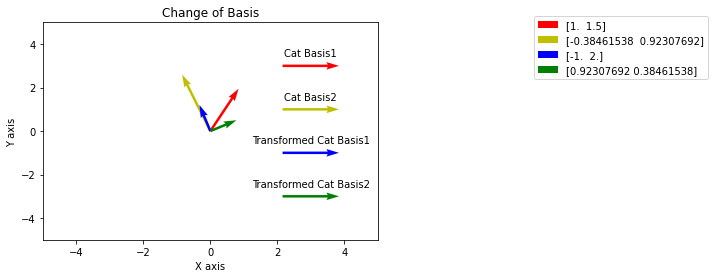

In [37]:
catBasis = np.array([[1,-1],
                     [1.5,2]])

T = buildReflectionMatrix(catBasis)
plot(catBasis,T)